In [4]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [9]:
# read in excel file
file_2015 = 'happiness_data/2015.csv'
file_2016 = 'happiness_data/2016.csv'
file_2017 = 'happiness_data/2017.csv'

happiness_data_2015 = pd.read_csv(file_2015)
happiness_data_2016 = pd.read_csv(file_2016)
happiness_data_2017 = pd.read_csv(file_2017)

#add year column
happiness_data_2015['Year']= 2015
happiness_data_2016['Year']= 2016
happiness_data_2017['Year']= 2017

#get ready to concatenate our data together
list_data = [happiness_data_2015, happiness_data_2016, happiness_data_2017]


# happiness_data = pd.concat(list_data)

# happiness_data.head()

#match column names in all three data files
happiness_data_2017 = happiness_data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 
                                      'Happiness.Score': 'Happiness Score',
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                                      'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 
                                      'Dystopia.Residual' : 'Dystopia Residual'})

happiness_data_2015 = happiness_data_2015[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual', 'Year']]
happiness_data_2016 = happiness_data_2016[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual', 'Year']]
happiness_data_2017 = happiness_data_2017[['Country', 'Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual', 'Year']]

In [10]:
#adding region column to 2017 data, cleaning up country/region names
country_region = {}

for i,row in happiness_data_2015.iterrows():
    country_region.update({row['Country']:row['Region']})
for i,row in happiness_data_2016.iterrows():
    country_region.update({row['Country']:row['Region']})
   
happiness_data_2017['Region'] = ''

try:
    for i, row in happiness_data_2017.iterrows():
        country = row['Country']
    if country == 'Taiwan Province of China':
        happiness_data_2017.at[i,'Country'] = 'Taiwan'
        happiness_data_2017.at[i,'Region'] = 'Eastern Asia'
    elif country == 'Belize':
        happiness_data_2017.at[i,'Region'] = 'Latin America and Caribbean'
    elif country == 'Hong Kong S.A.R., China':
        happiness_data_2017.at[i,'Region'] = 'Eastern Asia'
    elif country == 'Somalia':
        happiness_data_2017.at[i,'Region'] = 'Sub-Saharan Africa'
    else:
        happiness_data_2017.at[i,'Region'] = country_region[country]
except KeyError:
        print(f"Cannot find {country}")
        pass
   
#rearranging columns for cleaniness
happiness_data_2017 = happiness_data_2017[['Year','Country', 'Region','Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual']]
happiness_data_2015 = happiness_data_2015[['Year','Country', 'Region','Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual']]
happiness_data_2016 = happiness_data_2016[['Year','Country', 'Region','Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual']]

# Freedom's Effect on World Happiness

In [28]:
data_2015 = happiness_data_2015[['Year','Country', 'Region','Happiness Rank', 'Happiness Score',
                                          'Freedom', 'Trust (Government Corruption)', 'Generosity','Economy (GDP per Capita)']]
data_2016 = happiness_data_2016[['Year','Country', 'Region','Happiness Rank', 'Happiness Score',
                                          'Freedom', 'Trust (Government Corruption)', 'Generosity','Economy (GDP per Capita)']]
data_2017 = happiness_data_2017[['Year','Country', 'Region','Happiness Rank', 'Happiness Score',
                                          'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Economy (GDP per Capita)']]

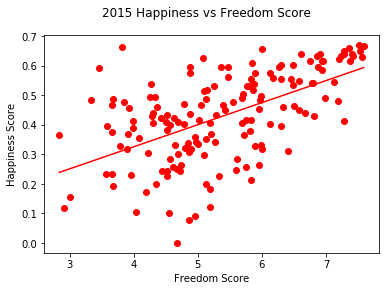

In [29]:
happiness_2015 = data_2015['Happiness Score']
happiness_2016 = data_2016['Happiness Score']
happiness_2017 = data_2017['Happiness Score']

freedom_2015 = data_2015['Freedom']
freedom_2016 = data_2016['Freedom']
freedom_2017 = data_2017['Freedom']

gdp_2015 = data_2015['Economy (GDP per Capita)']
gdp_2016 = data_2016['Economy (GDP per Capita)']
gdp_2017 = data_2017['Economy (GDP per Capita)']

(slope, intercept, _, _, _) = linregress(happiness_2015, freedom_2015)
fit = slope * happiness_2015 + intercept

fig, ax = plt.subplots()

fig.suptitle("2015 Happiness vs Freedom Score")
ax.set_xlabel("Freedom Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2015, freedom_2015, linewidth=0, marker='o', color = "red")
ax.plot(happiness_2015, fit, 'red')

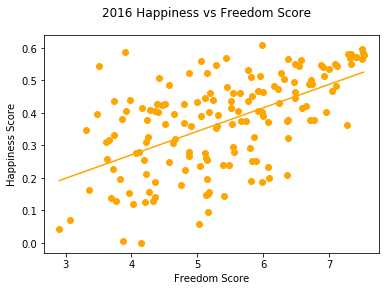

In [13]:
(slope, intercept, _, _, _) = linregress(happiness_2016, freedom_2016)
fit = slope * happiness_2016 + intercept

fig, ax = plt.subplots()

fig.suptitle("2016 Happiness vs Freedom Score")
ax.set_xlabel("Freedom Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2016, freedom_2016, linewidth=0, marker='o', color = "orange")
ax.plot(happiness_2016, fit, 'orange')

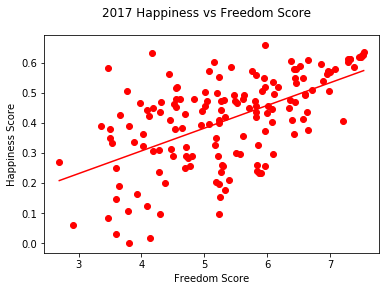

In [15]:
(slope, intercept, _, _, _) = linregress(happiness_2017, freedom_2017)
fit = slope * happiness_2017 + intercept

fig, ax = plt.subplots()

fig.suptitle("2017 Happiness vs Freedom Score")
ax.set_xlabel("Freedom Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2017, freedom_2017, linewidth=0, marker='o', color = "red")
ax.plot(happiness_2017, fit, 'red')

In [17]:
freedom_2015_r = r2_score(happiness_2015, freedom_2015)
freedom_2016_r = r2_score(happiness_2016, freedom_2016)
freedom_2017_r = r2_score(happiness_2017, freedom_2017)
print(freedom_2015_r)
print(freedom_2016_r)
print(freedom_2017_r)

-18.654156704149283
-19.261547962852593
-19.100963428130775


# Trust in Government's Effect on World Happiness

In [18]:
trust_2015 = data_2015['Trust (Government Corruption)']
trust_2016 = data_2016['Trust (Government Corruption)']
trust_2017 = data_2017['Trust (Government Corruption)']

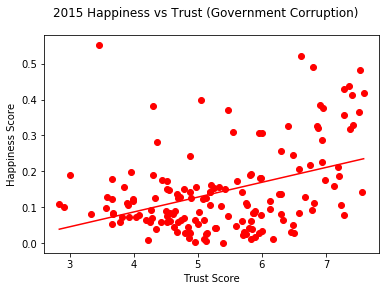

In [19]:
(slope, intercept, _, _, _) = linregress(happiness_2015, trust_2015)
fit = slope * happiness_2015 + intercept

fig, ax = plt.subplots()

fig.suptitle("2015 Happiness vs Trust (Government Corruption)")
ax.set_xlabel("Trust Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2015, trust_2015, linewidth=0, marker='o', color = "red")
ax.plot(happiness_2015, fit, 'red')

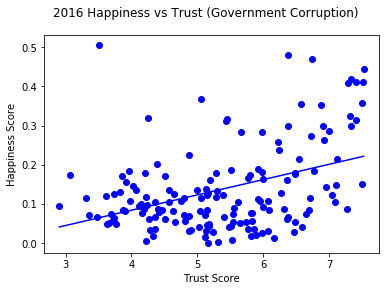

In [20]:
(slope, intercept, _, _, _) = linregress(happiness_2016, trust_2016)
fit = slope * happiness_2016 + intercept

fig, ax = plt.subplots()

fig.suptitle("2016 Happiness vs Trust (Government Corruption)")
ax.set_xlabel("Trust Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2016, trust_2016, linewidth=0, marker='o', color = "blue")
ax.plot(happiness_2016, fit, 'blue')

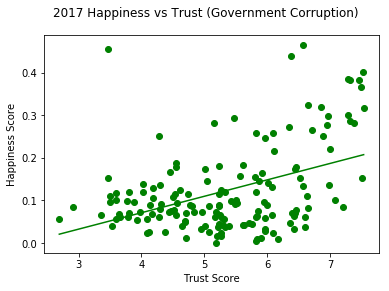

In [21]:
(slope, intercept, _, _, _) = linregress(happiness_2017, trust_2017)
fit = slope * happiness_2017 + intercept

fig, ax = plt.subplots()

fig.suptitle("2017 Happiness vs Trust (Government Corruption)")
ax.set_xlabel("Trust Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2017, trust_2017, linewidth=0, marker='o', color = "green")
ax.plot(happiness_2017, fit, 'green')

In [22]:
trust_2015_r = r2_score(happiness_2015, trust_2015)
trust_2016_r = r2_score(happiness_2016, trust_2016)
trust_2017_r = r2_score(happiness_2017, trust_2017)
print(trust_2015_r)
print(trust_2016_r)
print(trust_2017_r)

-20.94297100979558
-21.169054311556174
-21.451922169771514


# Generosity's Effect on World Happiness

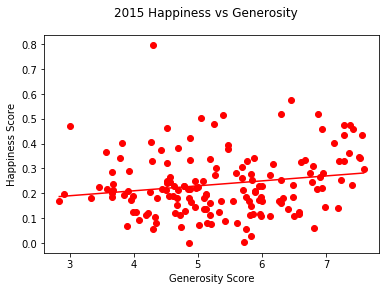

In [23]:
generosity_2015 = data_2015['Generosity']
generosity_2016 = data_2016['Generosity']
generosity_2017 = data_2017['Generosity']

(slope, intercept, _, _, _) = linregress(happiness_2015, generosity_2015)
fit = slope * happiness_2015 + intercept

fig, ax = plt.subplots()

fig.suptitle("2015 Happiness vs Generosity")
ax.set_xlabel("Generosity Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2015, generosity_2015, linewidth=0, marker='o', color = "red")
ax.plot(happiness_2015, fit, 'red')

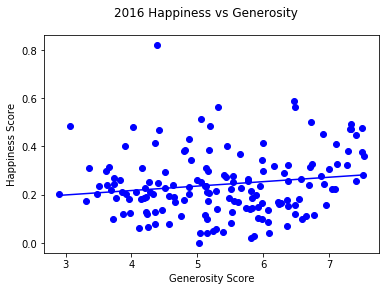

In [24]:
(slope, intercept, _, _, _) = linregress(happiness_2016, generosity_2016)
fit = slope * happiness_2016 + intercept

fig, ax = plt.subplots()

fig.suptitle("2016 Happiness vs Generosity")
ax.set_xlabel("Generosity Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2016, generosity_2016, linewidth=0, marker='o', color = "blue")
ax.plot(happiness_2016, fit, 'blue')

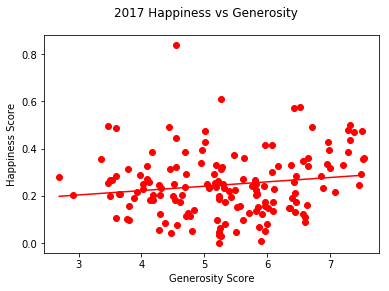

In [25]:
(slope, intercept, _, _, _) = linregress(happiness_2017, generosity_2017)
fit = slope * happiness_2017 + intercept

fig, ax = plt.subplots()

fig.suptitle("2017 Happiness vs Generosity")
ax.set_xlabel("Generosity Score")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2017, generosity_2017, linewidth=0, marker='o', color = "red")
ax.plot(happiness_2017, fit, 'red')

In [26]:
genero_2015_r = r2_score(happiness_2015, generosity_2015)
genero_2016_r = r2_score(happiness_2016, generosity_2016)
genero_2017_r = r2_score(happiness_2017, generosity_2017)
print(genero_2015_r)
print(genero_2016_r)
print(genero_2017_r)

-20.23988435516908
-20.372802897097994
-20.491839923684566


In [27]:
# Attempt to find correlation within certain regions.
# region_data_2015 = data_2015.loc[data_2015['Region'] == "Western Europe"]
# region_data_2016 = data_2016.loc[data_2016['Region'] == "Western Europe"]
# region_data_2017 = data_2017.loc[data_2017['Region'] == "Western Europe"]

In [1]:
# region_happiness_2015 = region_data_2015['Happiness Score']
# region_freedom_2015 = region_data_2015['Freedom']

# (slope, intercept, _, _, _) = linregress(region_happiness_2015, region_freedom_2015)
# fit = slope * region_happiness_2015 + intercept

# fig, ax = plt.subplots()

# fig.suptitle("2015 Western Europe Happiness vs Freedom")
# ax.set_xlabel("Freedom Score")
# ax.set_ylabel("Happiness Score")

# ax.plot(region_happiness_2015, region_freedom_2015, linewidth=0, marker='o', color = "red")
# ax.plot(region_happiness_2015, fit, 'red')

In [2]:
# region_happiness_2016 = region_data_2016['Happiness Score']
# region_freedom_2016 = region_data_2016['Freedom']

# (slope, intercept, _, _, _) = linregress(region_happiness_2016, region_freedom_2016)
# fit = slope * region_happiness_2016 + intercept

# fig, ax = plt.subplots()

# fig.suptitle("2016 Western Europe Happiness vs Freedom")
# ax.set_xlabel("Freedom Score")
# ax.set_ylabel("Happiness Score")

# ax.plot(region_happiness_2016, region_freedom_2016, linewidth=0, marker='o', color = "blue")
# ax.plot(region_happiness_2016, fit, 'blue')

# Economoy's Effect on World Happiness

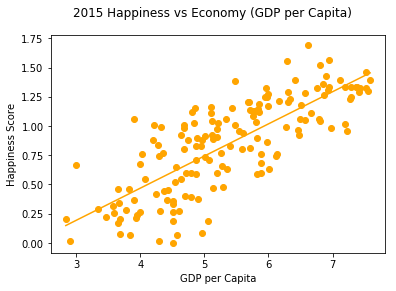

In [32]:
(slope, intercept, _, _, _) = linregress(happiness_2015, gdp_2015)
fit = slope * happiness_2015 + intercept

fig, ax = plt.subplots()

fig.suptitle("2015 Happiness vs Economy (GDP per Capita)")
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2015, gdp_2015, linewidth=0, marker='o', color = "orange")
ax.plot(happiness_2015, fit, 'orange')

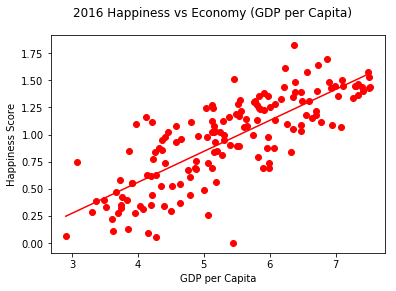

In [33]:
(slope, intercept, _, _, _) = linregress(happiness_2016, gdp_2016)
fit = slope * happiness_2016 + intercept

fig, ax = plt.subplots()

fig.suptitle("2016 Happiness vs Economy (GDP per Capita)")
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2016, gdp_2016, linewidth=0, marker='o', color = "red")
ax.plot(happiness_2016, fit, 'red')

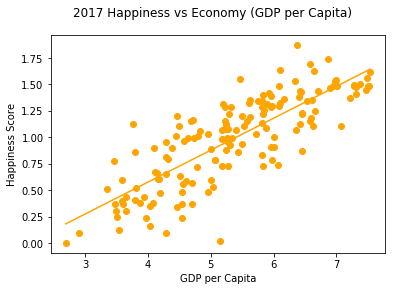

In [30]:
(slope, intercept, _, _, _) = linregress(happiness_2017, gdp_2017)
fit = slope * happiness_2017 + intercept

fig, ax = plt.subplots()

fig.suptitle("2017 Happiness vs Economy (GDP per Capita)")
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Happiness Score")

ax.plot(happiness_2017, gdp_2017, linewidth=0, marker='o', color = "orange")
ax.plot(happiness_2017, fit, 'orange')

In [35]:
gdp_2015_r = r2_score(happiness_2015, gdp_2015)
gdp_2016_r = r2_score(happiness_2016, gdp_2016)
gdp_2017_r = r2_score(happiness_2017, gdp_2017)
print(gdp_2015_r)
print(gdp_2016_r)
print(gdp_2017_r)

-15.323224526628952
-14.700776200283762
-14.549192934825168
